Using device: cpu


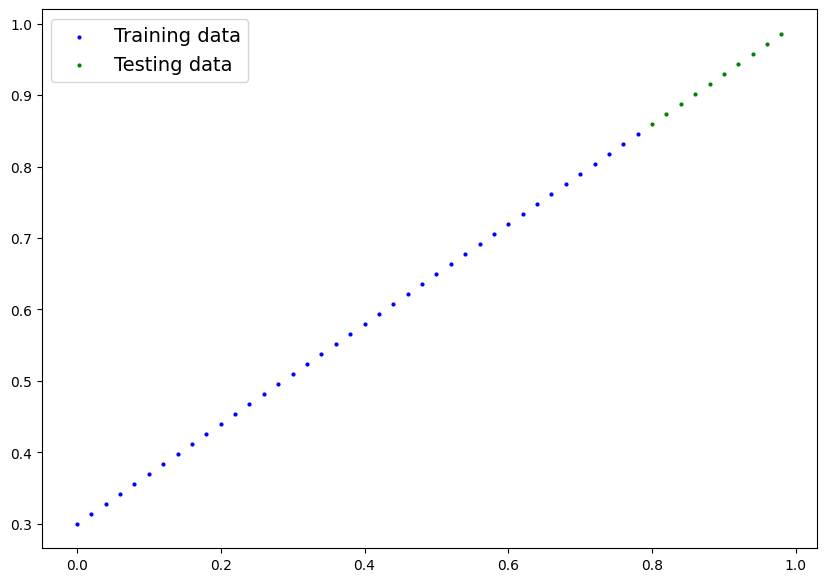

In [ ]:
import torch 
from torch import nn
import matplotlib.pyplot as plt



weight = 0.7
bias =0.3

start =0
end =1
step =0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)


def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
    plt.figure(figsize=(10,7))

    plt.scatter(train_data, train_labels, c='b', s=4, label="Training data")
    plt.scatter(test_data, test_labels, c='g', s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label = "Predictions")
    
    plt.legend(prop={"size": 14});

plot_predictions()

In [12]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.rand(1, dtype= torch.float), requires_grad= True)
        self.bias = nn.Parameter(torch.rand(1, dtype= torch.float), requires_grad= True)


    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [13]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters()) # lists simply
model_0.state_dict() # lists with the parameter name

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [14]:
with torch.inference_mode():
    y_preds = model_0(X_test)

print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])


In [17]:
loss_fn = nn.L1Loss()
optimiser = torch.optim.SGD(params=model_0.parameters(), lr = 0.01)



In [18]:
torch.manual_seed(42)

epochs = 100

train_loss_values = []
test_loss_values = []
epoch_count = []


for epoch in range(epochs):
    model_0.train()
    y_pred = model_0(X_train)
    loss = loss_fn(y_pred, y_train)
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

    model_0.eval()

    with torch.inference_mode():
        test_pred = model_0(X_test)
       
        test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

     
    if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")


Epoch: 0 | MAE Train Loss: 0.6860889196395874 | MAE Test Loss: 0.7637526988983154 
Epoch: 10 | MAE Train Loss: 0.5708791017532349 | MAE Test Loss: 0.6290428042411804 
Epoch: 20 | MAE Train Loss: 0.45566922426223755 | MAE Test Loss: 0.4943329691886902 
Epoch: 30 | MAE Train Loss: 0.34045934677124023 | MAE Test Loss: 0.35962313413619995 
Epoch: 40 | MAE Train Loss: 0.2252494841814041 | MAE Test Loss: 0.2249133139848709 
Epoch: 50 | MAE Train Loss: 0.1100396141409874 | MAE Test Loss: 0.09020347893238068 
Epoch: 60 | MAE Train Loss: 0.009724985808134079 | MAE Test Loss: 0.020998019725084305 
Epoch: 70 | MAE Train Loss: 0.006216754671186209 | MAE Test Loss: 0.014099234715104103 
Epoch: 80 | MAE Train Loss: 0.002788322512060404 | MAE Test Loss: 0.005826681852340698 
Epoch: 90 | MAE Train Loss: 0.007095950655639172 | MAE Test Loss: 0.00754010071977973 


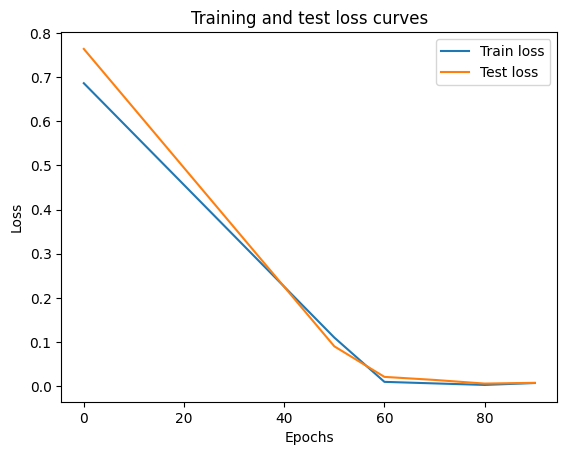

In [20]:
#plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [22]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict({'weights': tensor([0.6977]), 'bias': tensor([0.3080])})

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [24]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(X_test)
y_preds

tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])

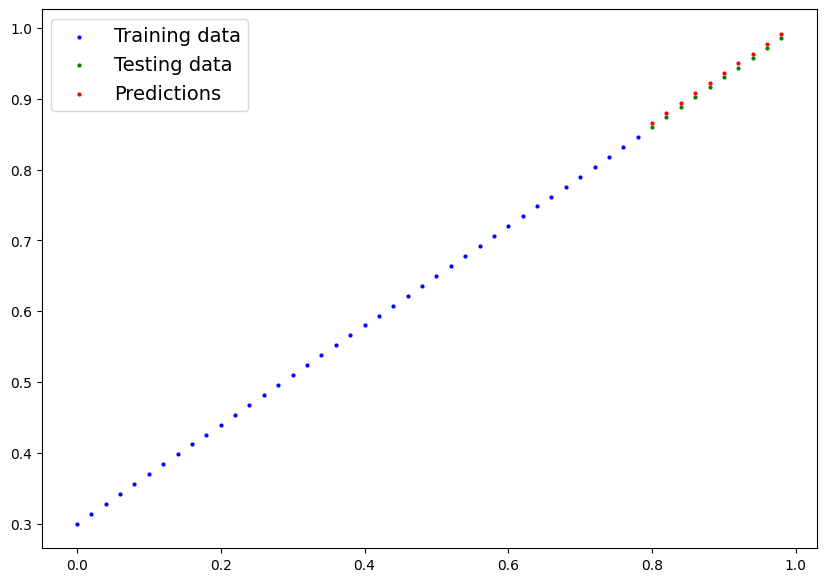

In [25]:
plot_predictions(predictions=y_preds)

In [26]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 

Saving model to: models/01_pytorch_workflow_model_0.pth


In [27]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [28]:
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model

In [29]:
# Compare previous model predictions with loaded model predictions (these should be the same)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])